## Neural Networks with Tensorflow and Esitmator API
- Kartik Gupta
- PB40
- TY CSE - Panel B

In [1]:
import os
#Setting the device to CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#Importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
#Importing the dataset
dataset = pd.read_csv('census_data.csv')

In [3]:
#Extracting and processing the lables
Y = dataset['income_bracket']
Y = Y.apply(lambda x: 0 if x == " <=50K" else 1)
#Getting the attributes
X = dataset.drop('income_bracket',axis = 1)
#Scaling the values [Min-Max scaling]
to_scale = ['capital_gain',
       'capital_loss', 'hours_per_week','education_num']
X[to_scale] = X[to_scale].apply(lambda x : (x-x.min())/(x.max()-x.min()))

In [4]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,50,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,38,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,53,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,28,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


In [5]:
#Feature columns for categorical data
workc = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('workclass',hash_bucket_size=10), dimension=9)
educ = tf.feature_column.embedding_column((tf.feature_column.categorical_column_with_hash_bucket('education',hash_bucket_size=10)),dimension=16)
marital = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('marital_status',hash_bucket_size=10),dimension=7)
race = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('race',hash_bucket_size=10),dimension=5)
gender = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('gender',hash_bucket_size=2),dimension=2)
country = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('native_country',hash_bucket_size=50),dimension=42)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7924826710>]],
      dtype=object)

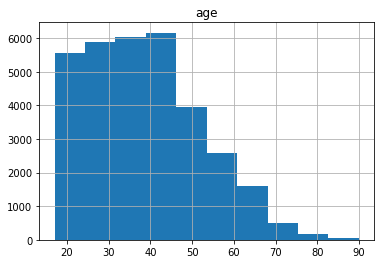

In [7]:
dataset.hist(column='age')

In [8]:
#Bins for age to convert them to categorical data
age = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('age'),boundaries=[20,30,40,50,60,70,80,90])

In [9]:
#making numeric columns
cap_gain = tf.feature_column.numeric_column('capital_gain')
cap_loss = tf.feature_column.numeric_column('capital_loss')
hrs = tf.feature_column.numeric_column('hours_per_week')
edu_num = tf.feature_column.numeric_column('education_num')

In [10]:
fea_col = [cap_gain,cap_loss,hrs,age,workc,educ,marital,race,gender,country,edu_num]

In [11]:
#Creating the training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 101)

In [12]:
#Getting the neural network model from estimator API
model = tf.estimator.DNNClassifier(hidden_units=[10,10,10,10],feature_columns=fea_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqiz_9bu7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
#Setting the input to the estimator API
input_f = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=Y_train,shuffle=True,batch_size=10,num_epochs=100)

In [14]:
#Training the model
model.train(input_fn=input_f,steps=10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.


In [16]:
#Getting the predictions on the test set
pre_input_f = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y=Y_test,shuffle=False)
predictions = []
for pred in list(model.predict(pre_input_f)):
    predictions.append(pred['class_ids'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqiz_9bu7/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [17]:
#Displaying the evaluation result
print(model.evaluate(input_fn=pre_input_f,steps=1000))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T21:39:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqiz_9bu7/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.77220s
INFO:tensorflow:Finished evaluation at 2020-08-29-21:39:30
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.7611833, accur